In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import preprocessor as p
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
import inflect
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#import database
df = pd.read_csv("../Database/IMDB Dataset Cleaned.csv")
df = df[['cleaned_review', 'sentiment']]

In [3]:
#replace positive with 1 and negative with 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# **Random Forest**

In [4]:
#random forest model with sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

#split data into training and testing 70/30
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#vectorize the data
vectorizer = CountVectorizer()

#fit and transform training data
X_train = vectorizer.fit_transform(X_train)

#transform testing data
X_test = vectorizer.transform(X_test)



In [5]:
#random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [6]:
predictions = clf.predict(X_test)

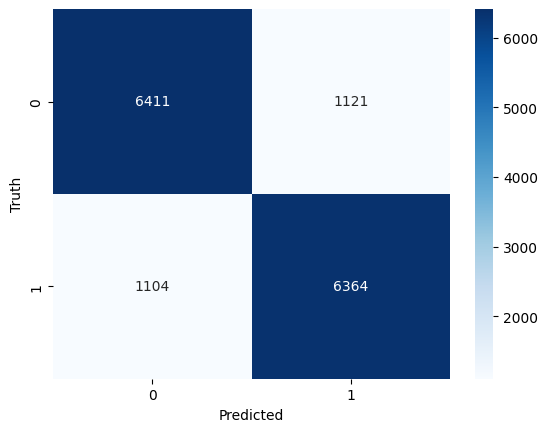

In [7]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#use seaborn to plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#axis labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print('Classification Report: ', classification_report(y_test, predictions))

#accuracy score in percentage
print('Accuracy Score: ', accuracy_score(y_test, predictions)*100, '%')

Classification Report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85      7532
           1       0.85      0.85      0.85      7468

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

Accuracy Score:  85.16666666666667 %
